##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Build a neural network that classifies images.
2. Train this neural network.
3. And, finally, evaluate the accuracy of the model.

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

Download and install TensorFlow 2. Import TensorFlow into your program:

Note: Upgrade `pip` to install the TensorFlow 2 package. See the [install guide](https://www.tensorflow.org/install) for details.

In [2]:
import tensorflow as tf

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers:

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

The MNIST dataset is a compilation of low resolution hand-written digits. I believe it is scanned from the postal codes on the letters. Here we aim to correctly identify the digits to be a number from 0-9. Take a look at the scriggly digits below.

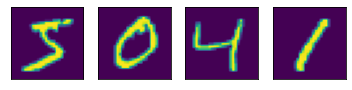

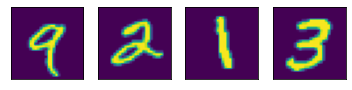

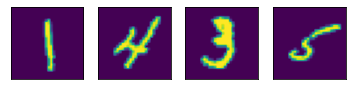

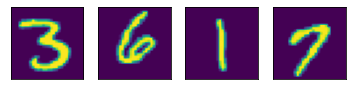

In [4]:
import matplotlib.pyplot as plt

N = 4
for k in range(4):
    fig, axarr = plt.subplots(1,N)
    for i,ax in enumerate(axarr):
        ax.imshow(x_train[k*N + i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

For each example the model returns a vector of "[logits](https://developers.google.com/machine-learning/glossary#logits)" or "[log-odds](https://developers.google.com/machine-learning/glossary#log-odds)" scores, one for each class.

In [6]:
predictions = model(x_train[:1]).numpy()
predictions # Some are negative?


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[ 0.6559121 ,  0.3656642 , -0.5949703 ,  0.23178495,  0.34946284,
         0.43451324, -0.18963867, -0.25201726,  0.16963118,  0.03627368]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to "probabilities" for each class: 

In [7]:
import numpy as np

In [8]:
np.sum(tf.nn.softmax(predictions).numpy())

1.0

In [9]:
tf.nn.softmax(predictions).numpy() # All are non-negative now

array([[0.16098261, 0.12042756, 0.04608161, 0.10533747, 0.11849219,
        0.12901098, 0.06911319, 0.06493372, 0.09898967, 0.08663101]],
      dtype=float32)

Note: It is possible to bake this `tf.nn.softmax` in as the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to
provide an exact and numerically stable loss calculation for all models when using a softmax output. 

The `losses.SparseCategoricalCrossentropy` loss takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [10]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) # What is sparse categorical cross entropy?

This loss is equal to the negative log probability of the true class:
It is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.log(1/10) ~= 2.3`.

In [11]:
loss_fn(y_train[:1], predictions).numpy()

2.0478578

In [12]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

The `Model.fit` method adjusts the model parameters to minimize the loss: 

In [13]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2859 - accuracy: 0.9153
Epoch 2/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1233 - accuracy: 0.9628
Epoch 3/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0900 - accuracy: 0.9736
Epoch 4/5
60000/60000 [==============================] - 2s 42us/sample - loss: 0.0695 - accuracy: 0.9785
Epoch 5/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0580 - accuracy: 0.9817


The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [14]:
model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 0s - loss: 0.0824 - accuracy: 0.9740


[0.08240609754241304, 0.974]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [15]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [16]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.4620406e-08, 2.6576043e-07, 4.2374251e-07, 5.5130426e-04,
        7.8466712e-11, 2.0063545e-08, 3.3135041e-14, 9.9944717e-01,
        9.2990584e-09, 8.0445875e-07],
       [1.3566087e-07, 2.0118803e-06, 9.9996650e-01, 2.9823786e-05,
        9.1027040e-11, 5.2539712e-11, 1.3144973e-10, 3.2252167e-08,
        1.5229485e-06, 1.6486758e-11],
       [9.0139401e-06, 9.9932027e-01, 1.2621132e-05, 3.3935106e-05,
        4.5087756e-05, 2.2956541e-05, 7.1178372e-05, 3.2365377e-04,
        1.6100740e-04, 2.7818876e-07],
       [9.9997604e-01, 7.4185391e-10, 5.0064233e-07, 2.0627885e-08,
        2.2239346e-06, 9.0932772e-08, 1.7691609e-05, 3.2299926e-07,
        1.1489866e-08, 3.1222660e-06],
       [1.0724637e-08, 1.4878874e-07, 2.0892672e-08, 5.9061971e-11,
        9.9998391e-01, 1.0083612e-06, 6.4701652e-08, 3.0399644e-08,
        3.5132535e-09, 1.4765566e-05]], dtype=float32)>

1. Plot 25 instances of the test dataset and their corresponding predicted classification vs. true classification.

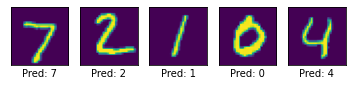

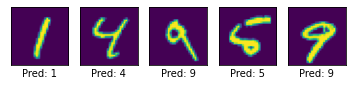

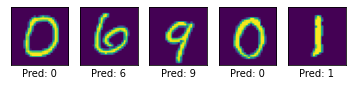

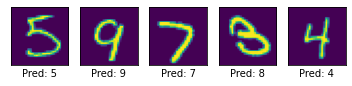

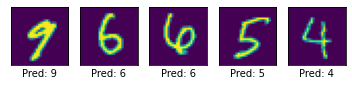

In [21]:
N = 5
for k in range(5):
    fig, axarr = plt.subplots(1,N)
    for i,ax in enumerate(axarr):
        ax.imshow(x_test[k*N + i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        true_class = y_test[k*N + i]
        predicted_class = np.argmax(model.predict(np.array([x_test[k*N + i]])))
        ax.xaxis.set_label_text('Pred: {}'.format(predicted_class))

2. Plot 25 instances where the model incorrectly classifies the test dataset input.

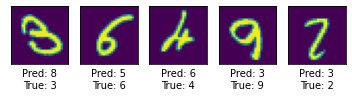

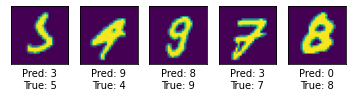

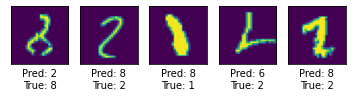

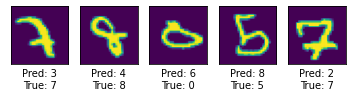

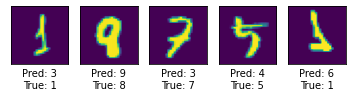

In [20]:
N = 5
j = 0
for k in range(5):
    fig, axarr = plt.subplots(1,N)
    i = 0
    while i < N:
        true_class = y_test[j]
        predicted_class = np.argmax(model.predict(np.array([x_test[j]])))
        if predicted_class != true_class:
            ax = axarr[i]
            ax.imshow(x_test[j])
            ax.xaxis.set_ticks([])
            ax.yaxis.set_ticks([])
            ax.xaxis.set_label_text('Pred: {}\nTrue: {}'.format(predicted_class, true_class))
            i += 1
        j += 1